# Online Recovery of Temporally Correlated Sparse Signals Using Multiple Measurement Vectors

In [18]:
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
sns.set_style("darkgrid")

## Numerical Setup

In [402]:
N=50
M = 20 # Number of measurements 
S = 5 # Number of non-zero coefficents 
K = 40
sparse_support= sp.random.choice(N, S, replace=False) # s locations chosen uniformly at random
Delta=10 # Time lag allowed in estimation 
Phi = sp.random.normal(0, 1, (K, M, N)) # K measurement matrices

In [403]:
def get_x_k(k, D_coeffs, z_coeffs, x_0_coeffs):
    if k == 0:
        return x_0_coeffs
    else: 
        return  D_coeffs*get_x_k(k-1, D_coeffs, z_coeffs, x_0_coeffs) + z_coeffs[k]

# Generated via the AR process
def get_x(K, sparse_support):
    S=len(sparse_support)
    x_0_coeffs = sp.random.normal(0, 1, S) 
    D_coeffs = sp.random.uniform(0.8, 1.0, S) # Correlation matrix with diagnonal entries chosen uniformly from [0.8, 1]
    z_coeffs = sp.random.normal(0, (1-D_coeffs**2)[1], (K, S))
    x=[sp.sparse.csr_matrix((get_x_k(k, D_coeffs, z_coeffs, x_0_coeffs), (
        sparse_support, sp.zeros(S))), shape=(N,1)) for k in range(K)]
    return sp.sparse.hstack(x), D_coeffs, z_coeffs

In [410]:
x, D_coeffs, z_coeffs = get_x(50, sparse_support)

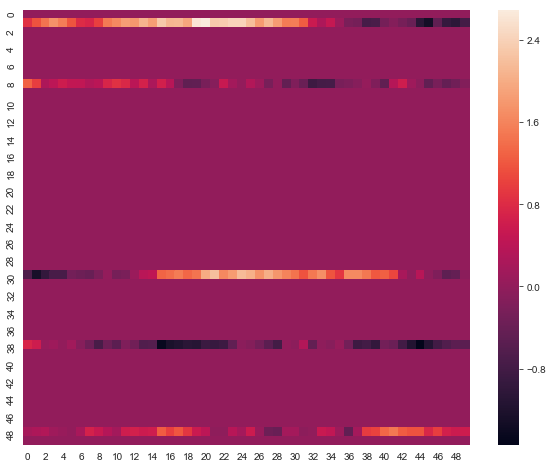

In [412]:
sns.heatmap(x.todense())

In [442]:
def get_y_k(k, x, Phi, noise=0):
    return Phi[k]*x.todense()[:,k] + noise

In [443]:
get_y_k(0, x, Phi)

matrix([[ 0.16122536],
        [ 2.12959573],
        [-2.12617323],
        [ 4.52410332],
        [-0.92371779],
        [-3.16099036],
        [-1.17462538],
        [ 1.15076723],
        [-1.15305712],
        [-1.95627503],
        [-0.15277197],
        [-0.84551283],
        [ 1.80881252],
        [ 1.09408158],
        [-1.3108321 ],
        [-2.95810325],
        [ 3.0910704 ],
        [ 1.75078184],
        [ 2.11092756],
        [-1.95304578]])

## Offline Kalman SBL

## Fixed Lag KSBL